[![runpod](https://img.shields.io/badge/RunPod-tested-sucess?logo=DPD&labelColor=673ab7)](https://runpod.io?ref=km0th85l)

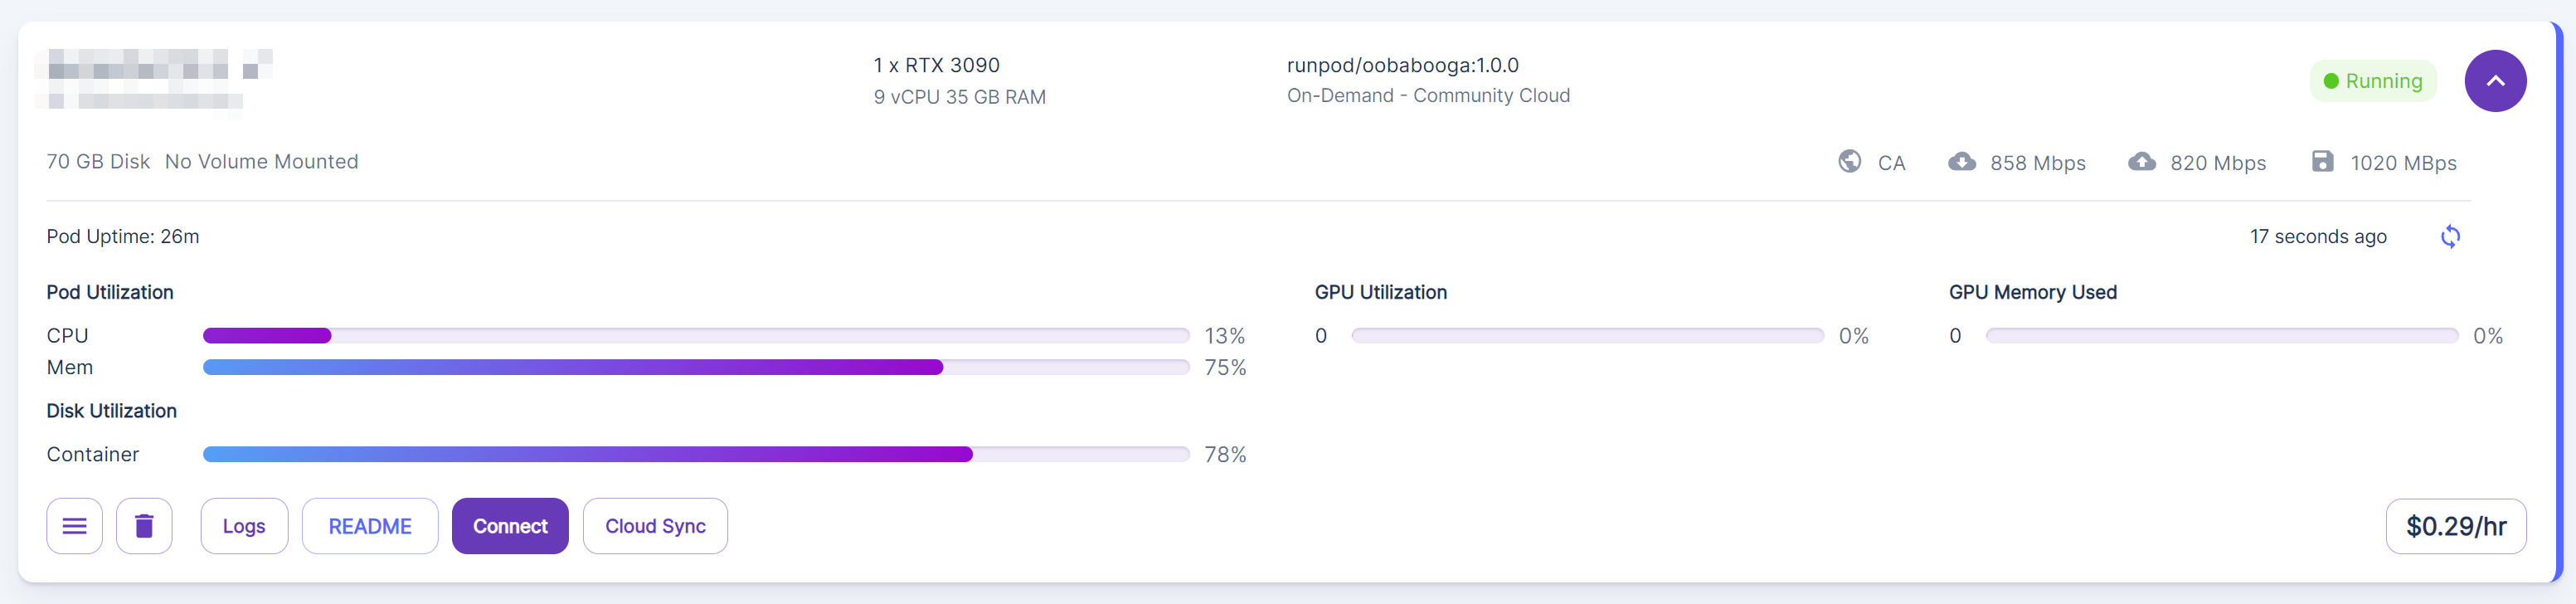

based on https://colab.research.google.com/drive/1wfrKqyPkz5BGD1Gkij_cvbUeweIDdRav?usp=sharing 

on Colbab, it would OOM around 85% of the merge.

In [1]:
# download code git repository
# 下载代码仓库
!git clone -b dev https://github.com/utensil/Alpaca-CoT.git code

Cloning into 'code'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 759 (delta 56), reused 74 (delta 44), pack-reused 659
Receiving objects: 100% (759/759), 127.13 MiB | 57.27 MiB/s, done.
Resolving deltas: 100% (405/405), done.


In [2]:
# install basic python package
# 安装必要的python库
!python -m pip install bitsandbytes
!python -m pip install datasets
!python -m pip install git+https://github.com/huggingface/transformers.git
!python -m pip install peft
!python -m pip install sentencepiece
!python -m pip install gradio


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-4n5ulz4x
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-4n5ulz4x
  Resolved https://github.com/huggingface/transformers.git to commit dacd34568d1a27b91f84610eab526640ed8f94e0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.29.0.dev0-py3-none-any.whl size=6928059 sha256=f8a12c7142e912792ebd17593fd1b3a9901a4a6c098f3c95ca23087792ed8067
  Stored in directory: /tmp/pip-ephem-wheel-cache-y6y9fuff/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c

In [4]:
# download model git repository
# 拉取模型仓库(checkpoint)
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/QingyiSi/Alpaca-CoT model

Cloning into 'model'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 44 (delta 2), reused 0 (delta 0), pack-reused 34
Unpacking objects: 100% (44/44), 5.44 KiB | 619.00 KiB/s, done.


In [6]:
# pull specify model and move it
# 从仓库中拉取指定的模型checkpoint，你可以在 https://huggingface.co/QingyiSi/Alpaca-CoT 查看可选的checkpoint
!cd /workspace/model && git config core.sparsecheckout true && git config lfs.fetchinclude saved-alpaca7b
!cd /workspace/model && git lfs pull
!du -lh /workspace/model/ -d 1

17M	/workspace/model/.git100% (1/1), 17 MB | 0 B/s                              
8.0K	/workspace/model/saved-alpaca-belle-cot13b
16K	/workspace/model/saved-alpaca-belle-cot7b
16K	/workspace/model/saved-alpaca-belle7b
16K	/workspace/model/saved-alpaca-cot13b
16K	/workspace/model/saved-alpaca-cot7b
17M	/workspace/model/saved-alpaca7b
8.0K	/workspace/model/saved-belle1.5m7b
16K	/workspace/model/saved-belle7b
16K	/workspace/model/saved-bloom7b_instinwild_cn-belle1.5m
16K	/workspace/model/saved-cot7b
8.0K	/workspace/model/saved_llama7b_codealpaca
33M	/workspace/model/


In [7]:
!mkdir /workspace/merged

In [10]:
# parameter merging (optional)
# 合并模型参数，可选
!cd /workspace/code && python merge.py --model_type llama --size 7b --lora_dir "/workspace/model/saved-alpaca7b" --merged_dir "/workspace/merged"


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda116.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib64'), PosixPath('/usr/local/nvidia/lib')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following di

https://github.com/ymcui/Chinese-LLaMA-Alpaca/issues/160

In [13]:
!python -m pip install --force-reinstall peft

  Using cached peft-0.2.0-py3-none-any.whl (40 kB)
  Using cached transformers-4.28.1-py3-none-any.whl (7.0 MB)
  Using cached accelerate-0.18.0-py3-none-any.whl (215 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 7.4 MB/s eta 0:00:0000:0100:01
  Using cached PyYAML-6.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (682 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.1/282.1 kB 13.8 MB/s eta 0:00:00
  Using cached numpy-1.24.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 13.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 25.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 19.0 MB/s eta 0:00:0000:0100:01
     ━━━

In [26]:
!cd /workspace/code && python merge.py --model_type llama --size 7b --lora_dir "/workspace/model/saved-alpaca7b" --merged_dir "/workspace/merged"


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda116.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib64'), PosixPath('/usr/local/nvidia/lib')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following di

In [29]:
!ls merged

config.json			  pytorch_model-00020-of-00039.bin
generation_config.json		  pytorch_model-00021-of-00039.bin
pytorch_model-00001-of-00039.bin  pytorch_model-00022-of-00039.bin
pytorch_model-00002-of-00039.bin  pytorch_model-00023-of-00039.bin
pytorch_model-00003-of-00039.bin  pytorch_model-00024-of-00039.bin
pytorch_model-00004-of-00039.bin  pytorch_model-00025-of-00039.bin
pytorch_model-00005-of-00039.bin  pytorch_model-00026-of-00039.bin
pytorch_model-00006-of-00039.bin  pytorch_model-00027-of-00039.bin
pytorch_model-00007-of-00039.bin  pytorch_model-00028-of-00039.bin
pytorch_model-00008-of-00039.bin  pytorch_model-00029-of-00039.bin
pytorch_model-00009-of-00039.bin  pytorch_model-00030-of-00039.bin
pytorch_model-00010-of-00039.bin  pytorch_model-00031-of-00039.bin
pytorch_model-00011-of-00039.bin  pytorch_model-00032-of-00039.bin
pytorch_model-00012-of-00039.bin  pytorch_model-00033-of-00039.bin
pytorch_model-00013-of-00039.bin  pytorch_model-00034-of-00039.bin
pytorch_model-00014-o